<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null in

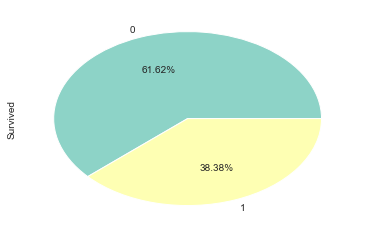

----------------------------------------------------------------------------------------------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.0

In [15]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('dark_background')
sns.set_style('whitegrid')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv') 

print(train_data.info())
print("-" * 100)
print(test_data.info())
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.show()

print("-" * 100)
print(train_data.describe())

print("-" * 100)
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values
print(train_data.info())

print("-" * 100)
#replace missing value with U0
train_data['Cabin'] = train_data.Cabin.fillna('U0') 
print(train_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
性别与是否生存的关系 Sex
Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64
船舱等级和生存与否的关系 Pclass
Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64
Sex     Pclass  Survived
female  1       0   

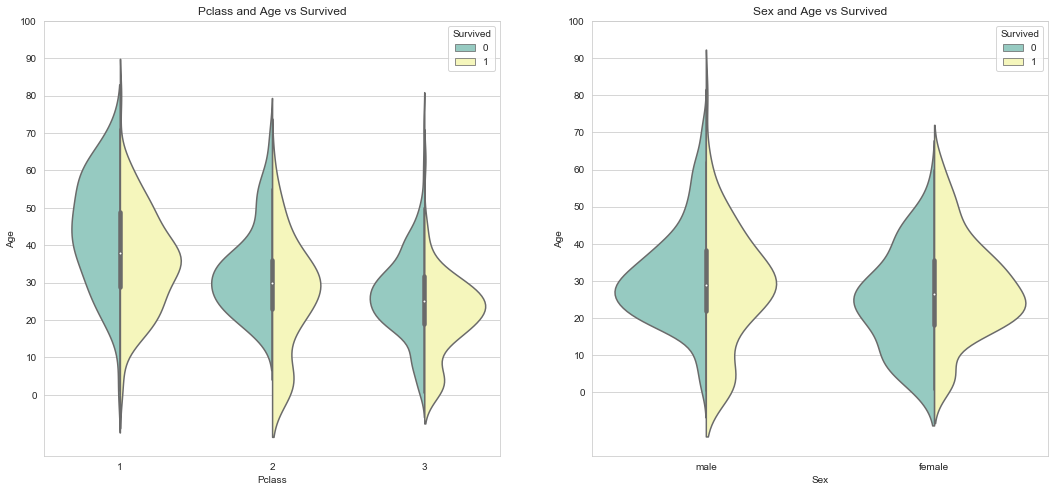

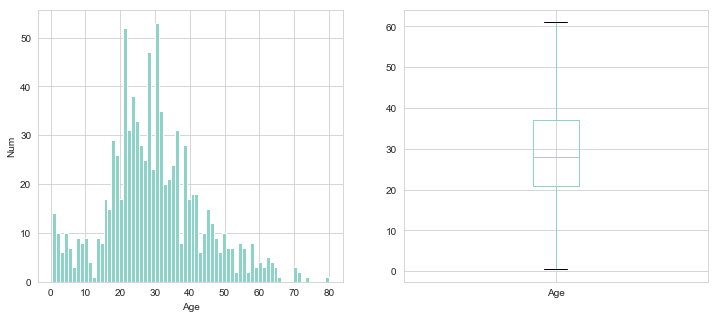

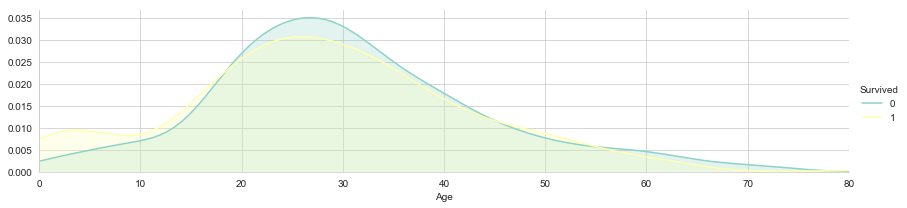

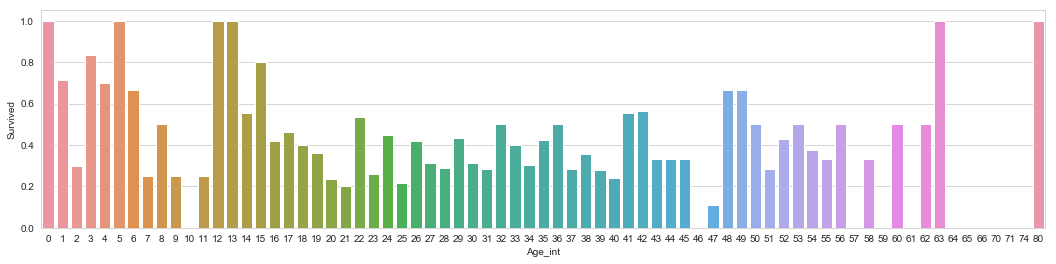

----------------------------------------------------------------------------------------------------
count    891.000000
mean      29.651934
std       13.739758
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64
----------------------------------------------------------------------------------------------------
Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64


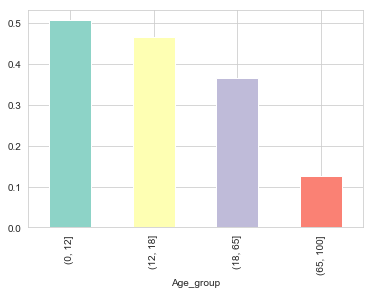

----------------------------------------------------------------------------------------------------
Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


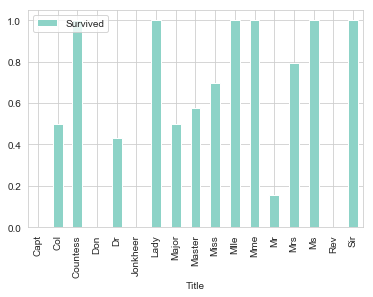

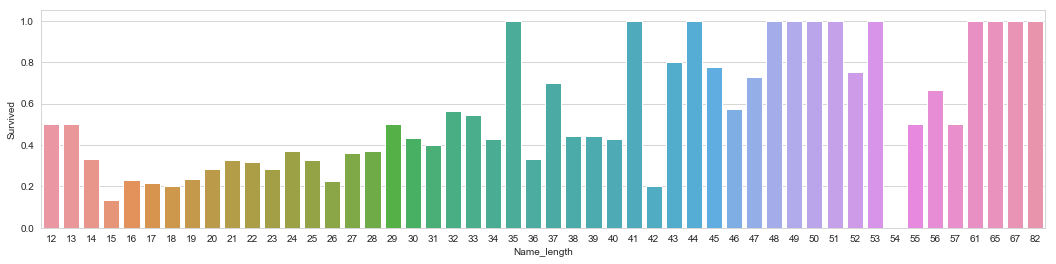

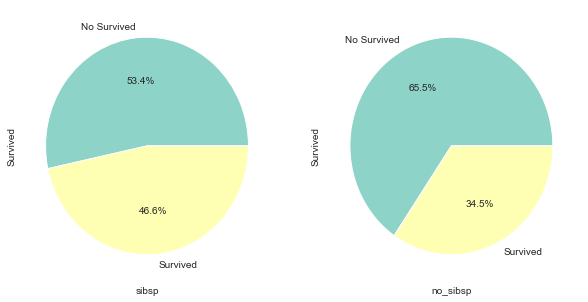

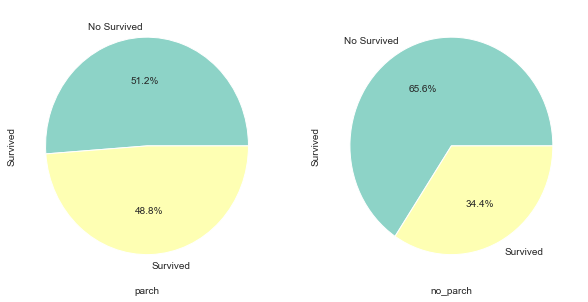

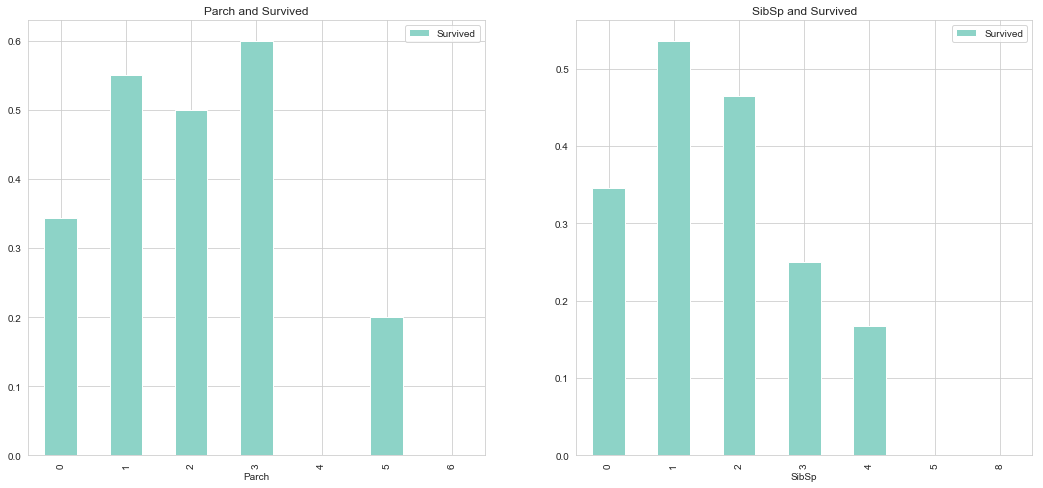

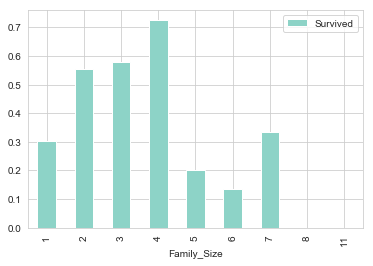

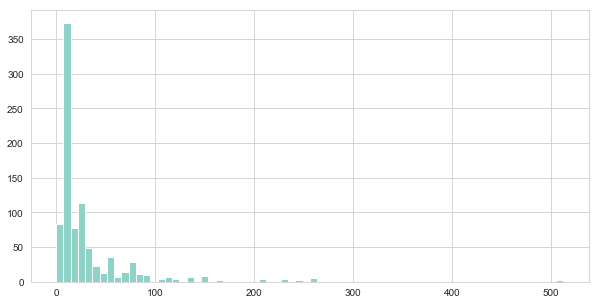

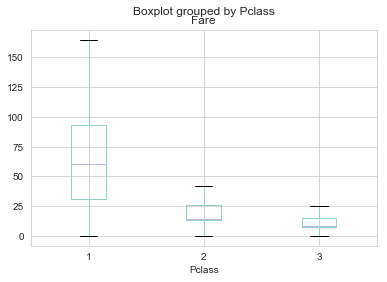

----------------------------------------------------------------------------------------------------
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


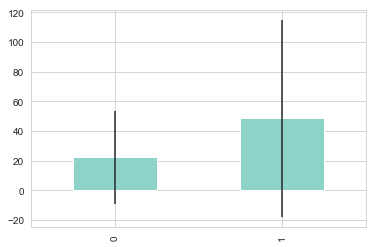

----------------------------------------------------------------------------------------------------
   S  C  Q
0  1  0  0
1  0  1  0
2  1  0  0
3  1  0  0
4  1  0  0
----------------------------------------------------------------------------------------------------
0    0
1    1
2    0
3    1
4    0
Name: CabinLetter, dtype: int64
0   -0.557232
1    0.607926
2   -0.265942
3    0.389459
4    0.389459
Name: Age_scaled, dtype: float64
0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]


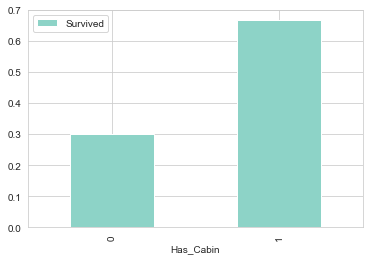

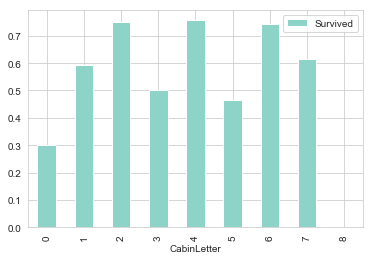

In [16]:
# 数据可视化部分
# 分析数据关系
#choose training data to predict age
from sklearn.ensemble import RandomForestRegressor

age_df = train_data[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]

X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train_data.loc[train_data['Age'].isnull(), ['Age']]= predictAges

print(train_data.info())

# 性别与是否生存的关系 Sex
print("性别与是否生存的关系 Sex")
print(train_data.groupby(['Sex','Survived'])['Survived'].count())
# train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

# 船舱等级和生存与否的关系 Pclass
print("船舱等级和生存与否的关系 Pclass")
print(train_data.groupby(['Pclass','Survived'])['Pclass'].count())
# train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

# 不同等级船舱的男女生存率
print(train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count())
# train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

# 年龄与存活与否的关系 Age

# 分别分析不同等级船舱和不同性别下的年龄分布和生存的关系：
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train_data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=train_data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
# plt.savefig('violinplot.svg')
plt.show()

# 分析总体的年龄分布
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
train_data.boxplot(column='Age', showfliers=False)
plt.show()
# 不同年龄下的生存和非生存的分布情况
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

# 不同年龄下的平均生存率
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train_data["Age_int"] = train_data["Age"].astype(int)
average_age = train_data[["Age_int", "Survived"]].groupby(['Age_int'],as_index=False).mean()
sns.barplot(x='Age_int', y='Survived', data=average_age)
plt.show()

print("-" * 100)
print(train_data['Age'].describe())


# 按照年龄，将乘客划分为儿童、少年、成年和老年，分析四个群体的生还情况
print("-" * 100)
bins = [0, 12, 18, 65, 100]
train_data['Age_group'] = pd.cut(train_data['Age'], bins)
by_age = train_data.groupby('Age_group')['Survived'].mean()
print(by_age)

by_age.plot(kind = 'bar')
plt.show()

# 称呼与存活与否的关系 Name
# 通过观察名字数据，我们可以看出其中包括对乘客的称呼，
# 如：Mr、Miss、Mrs等，称呼信息包含了乘客的年龄、性别，
# 同时也包含了如社会地位等的称呼，如：Dr,、Lady、Major、Master等的称呼。
print("-" * 100)
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(pd.crosstab(train_data['Title'], train_data['Sex']))
train_data[['Title','Survived']].groupby(['Title']).mean().plot.bar()

plt.show()

# 对于名字，我们还可以观察名字长度和生存率之间存在关系的可能
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length','Survived']].groupby(['Name_length'],as_index=False).mean()
sns.barplot(x='Name_length', y='Survived', data=name_length)
# 可见，名字长度和生存与否确实也存在一定的相关性。
plt.show()

# 有无兄弟姐妹和存活与否的关系 SibSp
# 将数据分为有兄弟姐妹的和没有兄弟姐妹的两组：
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('sibsp')

plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_sibsp')

plt.show()

# 有无父母子女和存活与否的关系 Parch
parch_df = train_data[train_data['Parch'] != 0]
no_parch_df = train_data[train_data['Parch'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(121)
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('parch')

plt.subplot(122)
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_parch')

plt.show()

# 亲友的人数和存活与否的关系 SibSp & Parch
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')

train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp'] + 1
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()
# 从图表中可以看出，若独自一人，那么其存活率比较低；但是如果亲友太多的话，存活率也会很低。

plt.show()

# 票价分布和存活与否的关系 Fare
# 首先绘制票价分布情况
plt.figure(figsize=(10,5))
train_data['Fare'].hist(bins = 70)

train_data.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.show()

print("-" * 100)
print(train_data['Fare'].describe())

# 绘制生存与否与票价均值和方差的关系：
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
average_fare.plot(yerr=std_fare, kind='bar', legend=False)

plt.show()
# 由上图可知，票价与是否生还有一定的相关性，生还者的平均票价要大于未生还者的平均票价。


# 船舱类型和存活与否的关系 Cabin
# 由于船舱的缺失值确实太多，有效值仅仅有204个，很难分析出不同的船舱和存活的关系，所以在做特征工程的时候，可以直接将该组特征丢弃。
# 当然，这里我们也可以对其进行一下分析，对于缺失的数据都分为一类。
# 简单地将数据分为是否有Cabin记录作为特征，与生存与否进行分类

# Replace missing values with "U0"
train_data.loc[train_data.Cabin.isnull(), 'Cabin'] = 'U0'
train_data['Has_Cabin'] = train_data['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)
train_data[['Has_Cabin','Survived']].groupby(['Has_Cabin']).mean().plot.bar()

# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]
train_data[['CabinLetter','Survived']].groupby(['CabinLetter']).mean().plot.bar()


# 变量转换
# 变量转换的目的是将数据转换为适用于模型使用的数据，不同模型接受不同类型的数据，
# Scikit-learn要求数据都是数字型numeric，所以我们要将一些非数字型的原始数据转换为数字型numeric。
# 所以下面对数据的转换进行介绍，以在进行特征工程的时候使用。
# 所有的数据可以分为两类：
# 1.定性(Quantitative)变量可以以某种方式排序，Age就是一个很好的列子。
# 2.定量(Qualitative)变量描述了物体的某一（不能被数学表示的）方面，Embarked就是一个例子。
print("-" * 100)


# 定性(Qualitative)转换：


# 1. Dummy Variables
# 就是类别变量或者二元变量，当qualitative variable是一些频繁出现的几个独立变量时
# Dummy Variables比较适合使用。我们以Embarked为例，Embarked只包含三个值’S’,’C’,’Q’
# 我们可以使用下面的代码将其转换为dummies:
embark_dummies  = pd.get_dummies(train_data['Embarked'])
train_data = train_data.join(embark_dummies)
train_data.drop(['Embarked'], axis=1,inplace=True)

embark_dummies = train_data[['S', 'C', 'Q']]
print(embark_dummies.head())

# 2.Factorizing
# dummy不好处理Cabin（船舱号）这种标称属性，因为他出现的变量比较多。
# 所以Pandas有一个方法叫做factorize()，它可以创建一些数字，来表示类别变量，对每一个类别映射一个ID，
print("-" * 100)
# Replace missing values with "U0"
train_data['Cabin'][train_data.Cabin.isnull()] = 'U0'
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]

print(train_data['CabinLetter'].head())


# Scaling  缩放比例
# Scaling可以将一个很大范围的数值映射到一个很小的范围(通常是-1 - 1，或则是0 - 1)，
# 下面对Age进行Scaling：
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
train_data['Age_scaled'] = scaler.fit_transform(train_data['Age'].values.reshape(-1, 1))
print(train_data['Age_scaled'].head())

# Binning 离散化数据
# 下面的代码对Fare进行Binning。


train_data['Fare_bin'] = pd.qcut(train_data['Fare'], 5) # pd.qcut与pd.cut不同,qcut是按照值的频率均与分割
print(train_data['Fare_bin'].head())
# 在将数据Bining化后，要么将数据factorize化，要么dummies化

# factorize
train_data['Fare_bin_id'] = pd.factorize(train_data['Fare_bin'])[0]

# dummies
fare_bin_dummies_df = pd.get_dummies(train_data['Fare_bin']).rename(columns=lambda x: 'Fare_' + str(x))
train_data = pd.concat([train_data, fare_bin_dummies_df], axis=1)

plt.show()

(1)Embarked
      Age        Cabin  Embarked      Fare  \
0    22.0          NaN         0    7.2500   
1    38.0          C85         1   71.2833   
2    26.0          NaN         0    7.9250   
3    35.0         C123         0   53.1000   
4    35.0          NaN         0    8.0500   
5     NaN          NaN         2    8.4583   
6    54.0          E46         0   51.8625   
7     2.0          NaN         0   21.0750   
8    27.0          NaN         0   11.1333   
9    14.0          NaN         1   30.0708   
10    4.0           G6         0   16.7000   
11   58.0         C103         0   26.5500   
12   20.0          NaN         0    8.0500   
13   39.0          NaN         0   31.2750   
14   14.0          NaN         0    7.8542   
15   55.0          NaN         0   16.0000   
16    2.0          NaN         2   29.1250   
17    NaN          NaN         0   13.0000   
18   31.0          NaN         0   18.0000   
19    NaN          NaN         1    7.2250   
20   35.0          NaN

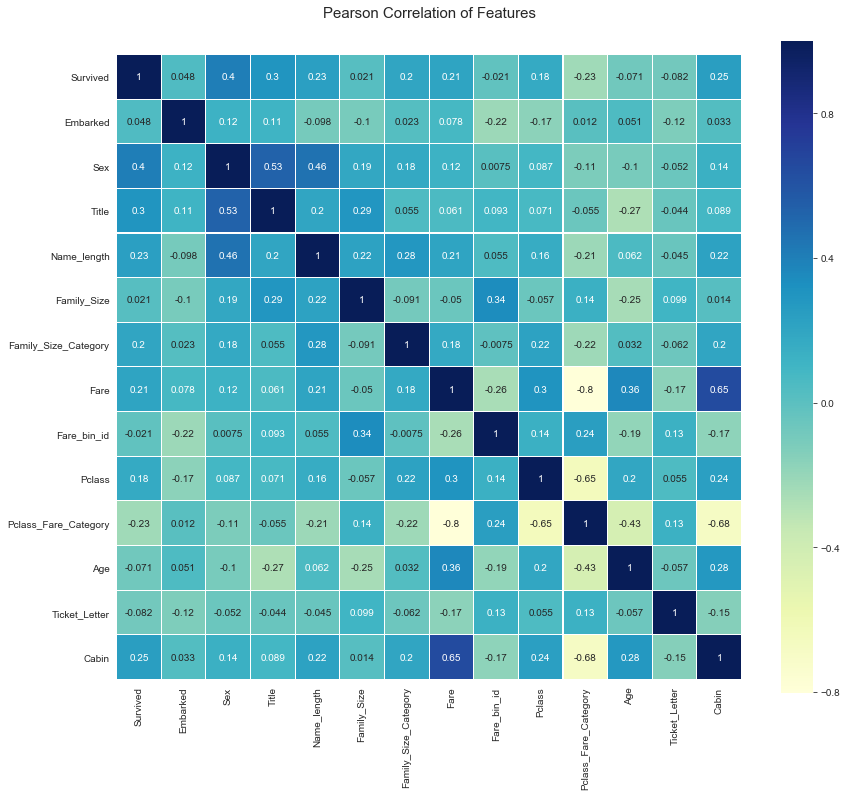

In [17]:
from numpy.core.umath_tests import inner1d
# 特征工程

train_df_org = pd.read_csv('train.csv')
test_df_org = pd.read_csv('test.csv')
test_df_org['Survived'] = 0
combined_train_test = train_df_org.append(test_df_org)
PassengerId = test_df_org['PassengerId']

# 对数据进行特征工程，也就是从各项参数中提取出对输出结果有或大或小的影响的特征，
# 将这些特征作为训练模型的依据。 一般来说，我们会先从含有缺失值的特征开始。

#  (1) Embarked
# 因为“Embarked”项的缺失值不多，所以这里我们以众数来填充：
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0], inplace=True)
# 对于三种不同的港口，由上面介绍的数值转换，
# 我们知道可以有两种特征处理方式：dummy和factorizing。
# 因为只有三个港口，所以我们可以直接用dummy来处理：

# 为了后面的特征分析，这里我们将 Embarked 特征进行factorizing
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]

# 使用 pd.get_dummies 获取one-hot 编码
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'], prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)

print("(1)Embarked")
print(combined_train_test)
print("_"*100)

# (2) Sex
# 对Sex也进行one-hot编码，也就是dummy处理：
# 为了后面的特征分析，这里我们也将 Sex 特征进行factorizing
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]

sex_dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test, sex_dummies_df], axis=1)

print("(2)Sex")
print(combined_train_test)
print("_"*100)

# (3) Name
# 首先先从名字中提取各种称呼：
# what is each person's title?
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])

# 将各式称呼进行统一化处理：
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)

# 为了后面的特征分析，这里我们也将 Title 特征进行factorizing
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]

# 使用dummy对不同的称呼进行分列：
title_dummies_df = pd.get_dummies(combined_train_test['Title'], prefix=combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test, title_dummies_df], axis=1)

# 增加名字长度的特征：
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)

print("(3)Name")
print(combined_train_test)
print("_"*100)

# (4) Fare
# 由前面分析可以知道，Fare项在测试数据中缺少一个值，所以需要对该值进行填充。
# 按照一二三等舱各自的均价来填充：
# 下面的transform将函数np.mean应用到各个group中。
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))

# 通过对Ticket数据的分析，我们可以看到部分票号数据有重复，同时结合亲属人数及名字的数据，
# 和票价船舱等级对比，我们可以知道购买的票中有家庭票和团体票，所以我们需要将团体票的票价分配到每个人的头上。

combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'], axis=1, inplace=True)

# 使用binning给票价分等级：
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'], 5)

# 为方便特征分析进行factorizing
combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]

# 对于5个等级的票价我们也可以继续使用dummy为票价等级分列：
fare_bin_dummies_df = pd.get_dummies(combined_train_test['Fare_bin_id']).rename(columns=lambda x: 'Fare_' + str(x))
combined_train_test = pd.concat([combined_train_test, fare_bin_dummies_df], axis=1)

combined_train_test.drop(['Fare_bin'], axis=1, inplace=True)

print("(4)Fare")
print(combined_train_test)
print("_"*100)

# (5) Pclass
# Pclass这一项，其实已经可以不用继续处理了，我们只需要将其转换为dummy形式即可。
# 但是为了更好的分析问题，这里假设对于不同等级的船舱，各船舱内部的票价也说明了各等级舱的位置，
# 那么也就很有可能与逃生的顺序有关系。所以这里分出每等舱里的高价和低价位。

from sklearn.preprocessing import LabelEncoder

# 建立PClass Fare Category
def pclass_fare_category(df, pclass1_mean_fare, pclass2_mean_fare, pclass3_mean_fare):
    if df['Pclass'] == 1:
        if df['Fare'] <= pclass1_mean_fare:
            return 'Pclass1_Low'
        else:
            return 'Pclass1_High'
    elif df['Pclass'] == 2:
        if df['Fare'] <= pclass2_mean_fare:
            return 'Pclass2_Low'
        else:
            return 'Pclass2_High'
    elif df['Pclass'] == 3:
        if df['Fare'] <= pclass3_mean_fare:
            return 'Pclass3_Low'
        else:
            return 'Pclass3_High'

Pclass1_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([1]).values[0]
Pclass2_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([2]).values[0]
Pclass3_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([3]).values[0]

# 建立Pclass_Fare Category 特征
combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(pclass_fare_category, 
                                                                        args=(Pclass1_mean_fare, Pclass2_mean_fare, Pclass3_mean_fare),
                                                                        axis=1)
pclass_level = LabelEncoder()

# 给每一项添加标签
pclass_level.fit(np.array(
    ['Pclass1_Low', 'Pclass1_High', 'Pclass2_Low', 'Pclass2_High', 'Pclass3_Low', 'Pclass3_High']))

# 转换成数值
combined_train_test['Pclass_Fare_Category'] = pclass_level.transform(combined_train_test['Pclass_Fare_Category'])

# dummy 转换
pclass_dummies_df = pd.get_dummies(combined_train_test['Pclass_Fare_Category']).rename(columns=lambda x: 'Pclass_' + str(x))
combined_train_test = pd.concat([combined_train_test, pclass_dummies_df], axis=1)

# 同时，将 Pclass 特征factorize化：
combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]

print("(5)Pclass")
print(combined_train_test)
print("_"*100)

# (6) Parch and SibSp
# 根据前面的分析，我们可以知道，亲友的数量没有或者太多会影响到Survived。
# 所以将二者合并为FamliySize这一组合项，同时也保留这两项。
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'

combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)

le_family = LabelEncoder()
le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
combined_train_test['Family_Size_Category'] = le_family.transform(combined_train_test['Family_Size_Category'])

family_size_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],
                                        prefix=combined_train_test[['Family_Size_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis=1)

print("(6)Parch and Sibsp")
print(combined_train_test)
print("_"*100)

# (7)  Age
# 因为Age项的缺失值较多，所以不能直接填充age的众数或者平均数。
# 常见的有两种对年龄的填充方式：一种是根据Title中的称呼，如Mr，Master、Miss等称呼不同类别的人的平均年龄来填充；
# 一种是综合几项如Sex、Title、Pclass等其他没有缺失值的项，使用机器学习算法来预测Age。
# 这里我们使用后者来处理。以Age为目标值，将Age完整的项作为训练集，将Age缺失的项作为测试集。

missing_age_df = pd.DataFrame(combined_train_test[
    ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']])

missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]
print("Missing_age")
# print(missing_age_test.head(5))
# print("_"*100)
print("Use RandomForestRegressor to predict 'Age'")

from sklearn.ensemble import RandomForestRegressor
#choose training data to predict age
age_df = missing_age_df
age_df_notnull = age_df.loc[(combined_train_test['Age'].notnull())]
age_df_isnull = age_df.loc[(combined_train_test['Age'].isnull())]

X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=3000, n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
combined_train_test.loc[combined_train_test['Age'].isnull(), ['Age']]= predictAges

# #choose training data to predict age
# age_df = combined_train_test[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
# age_df_notnull = age_df.loc[(combined_train_test['Age'].notnull())]
# age_df_isnull = age_df.loc[(combined_train_test['Age'].isnull())]

# X = age_df_notnull.values[:,1:]
# Y = age_df_notnull.values[:,0]
# # use RandomForestRegression to train data
# RFR = RandomForestRegressor(n_estimators=3000, n_jobs=-1)
# RFR.fit(X,Y)
# predictAges = RFR.predict(age_df_isnull.values[:,1:])
# combined_train_test.loc[combined_train_test['Age'].isnull(), ['Age']]= predictAges

print(combined_train_test['Age'])
print("(7)Age")
print(combined_train_test)
print("_"*100)

# (8) Ticket
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else x)

# 将 Ticket_Letter factorize
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]


# (9) Cabin
# 因为Cabin项的缺失值确实太多了，我们很难对其进行分析，或者预测。所以这里我们可以直接将Cabin这一项特征去除。
# 但通过上面的分析，可以知道，该特征信息的有无也与生存率有一定的关系，所以这里我们暂时保留该特征，并将其分为有和无两类。
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)

# 特征间相关性分析
# 挑选一些主要的特征，生成特征之间的关联图，查看特征与特征之间的相关性：

Correlation = pd.DataFrame(combined_train_test[
    ['Survived','Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass',
     'Pclass_Fare_Category', 'Age', 'Ticket_Letter', 'Cabin']])

colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
# plt.show()
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap="YlGnBu", linecolor='white', annot=True)
plt.show()


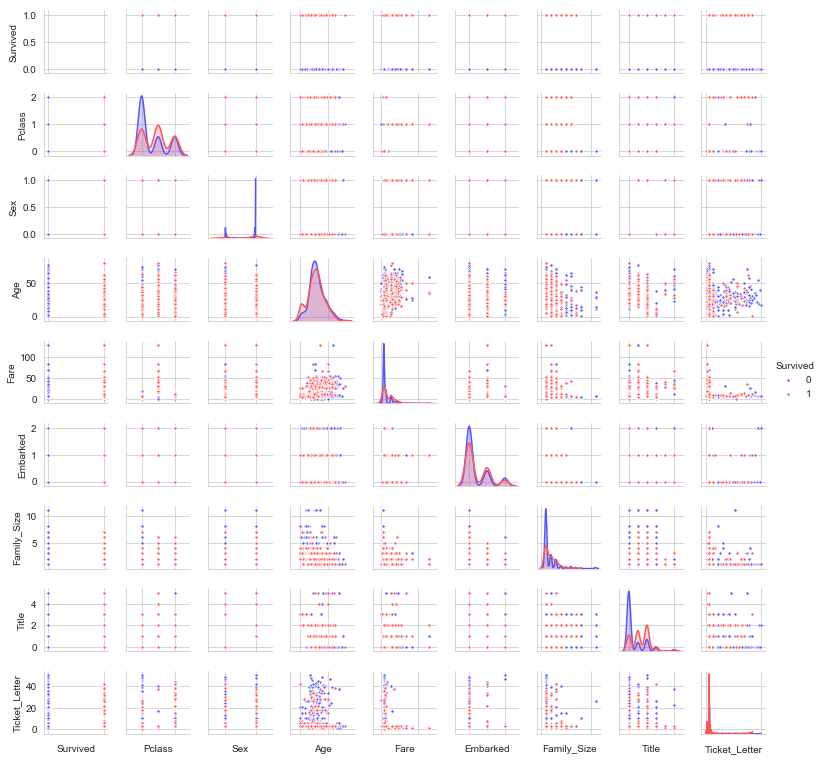

In [18]:
# 特征之间的数据分布图
g = sns.pairplot(combined_train_test[[u'Survived', u'Pclass', u'Sex', u'Age', u'Fare', u'Embarked',
       u'Family_Size', u'Title', u'Ticket_Letter']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])
# plt.savefig('featureDataDistribution.svg')
plt.show()

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re as re

train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})
full_data = [train, test]
PassengerId = test['PassengerId']

print (train.info())

print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())


for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())


for dataset in full_data:
    dataset['Title'] = [x[1].split(".")[0].strip(" ") for x in dataset['Name'].str.split(",")]

print(pd.crosstab(train['Title'], train['Sex']))


for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())



train_size = len(train)
test_size = len(test)

all_df = train.append(test)
all_df = all_df[list(train.columns)]

all_df.set_index(['PassengerId'], inplace=True) ## This is to make sure of a unique index for both train & test

## Processing family information
all_df['Last name'] = all_df['Name'].apply(lambda x: str.split(x, ",")[0])
all_df['Fare'].fillna(all_df['Fare'].mean(), inplace=True)

# The Fare is actually for the whole family
fare_df = all_df.loc[all_df['FamilySize']>1, ["Last name", "Fare", "FamilySize"]].iloc[:train_size]
fare_diff = (((fare_df.groupby(['Last name', 'FamilySize']).max() 
 - fare_df.groupby(['Last name', 'FamilySize']).min())!=0).sum()/train_size * 100)
print(("Percentage of families with different fares is: %.1f" %(fare_diff.values[0])) + '%')
# The data shows only 1.7% has a different fare value between family memebers. It's some type of anomaly
# Will use last name and fare to group passengers into families
# First would like to show there is value in doing this
train_temp_df = all_df.iloc[:train_size]
family_df_grpby = train_temp_df[train_temp_df['FamilySize']>1][
    ['Last name', 'Fare', 'FamilySize', 'Survived']].groupby(['Last name', 'Fare'])
family_df = pd.DataFrame(data=family_df_grpby.size(), columns=['Size in train'])
family_df['Survived total'] = family_df_grpby['Survived'].sum().astype(int)
family_df['FamilySize'] = family_df_grpby['FamilySize'].mean().astype(int)
#family_df = family_df[family_df['FamilySize']==8]
print("Whole family survived: %.1f" 
      %(100*len(family_df[family_df['Size in train']==family_df['Survived total'] ])/len(family_df))+'%') 
print("Whole family perished: %.1f" 
      %(100*len(family_df[family_df['Survived total'] == 0])/len(family_df))+'%') 
## Majority family either all perished or all survived, this means we can use this as one feature to 
## predict survival

# Now let's do the feature extraction
# Intialize all 'Family survival', meaning there is no information on if any family members survived. 
# This number can be tuned I guess but I will use it to start with.
grp_partial_age = 0
grp_partial_cabin = 0
grp_age_diff_df = pd.DataFrame()
all_df['Family survival'] = 0.5
for grp, grp_df in all_df[['Survived','Name', 'Last name', 'Fare', 
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last name', 'Fare']):
    if (len(grp_df) != 1):
        grp_missing_age = len(grp_df[grp_df['Age'].isnull()])
        is_partial_age = (grp_missing_age != 0) & (grp_missing_age != len(grp_df))
        grp_partial_age += is_partial_age
        
        sibsp_df = grp_df.loc[grp_df['SibSp']!=0, ['Age']]
        #print(sibsp_df.info())
        sibsp_age_diff = sibsp_df.max() - sibsp_df.min()
        grp_age_diff_df = grp_age_diff_df.append(sibsp_age_diff, ignore_index=True)

        grp_missing_cabin = len(grp_df[grp_df['Cabin'].isnull()])
        grp_partial_cabin += (grp_missing_cabin != 0) & (grp_missing_cabin != len(grp_df))


        for PassID, row in grp_df.iterrows():
            ## Find out if any family memebers survived or not
            smax = grp_df.drop(PassID)['Survived'].max()
            smin = grp_df.drop(PassID)['Survived'].min()

            ## If any family memebers survived, put this feature as 1
            if (smax==1.0): all_df.loc[PassID, 'Family survival'] = 1
            ## Otherwise if any family memebers perished, put this feature as 0
            elif (smin==0.0): all_df.loc[PassID, 'Family survival'] = 0

print("Number of passenger with family survival information: " 
      +str(all_df[all_df['Family survival']!=0.5].shape[0]))

print('partial age group: ' + str(grp_partial_age))
print('partial cabin group: ' + str(grp_partial_cabin))
print(grp_age_diff_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
      Sex  Survived
0  female  0.742038
1    male  0.188908
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
  Embarked  Survived
0        

In [20]:
# First find out how many such groups exists that are not families and what is the chance of 
# passengers within the same group survive or perish together
train_temp_df = all_df.iloc[:train_size]
ticket_grpby = train_temp_df.groupby('Ticket')
ticket_df = pd.DataFrame(data=ticket_grpby.size(), columns=['Size in train'])
ticket_df['Survived total'] = ticket_grpby['Survived'].sum().astype(int)
ticket_df['Not family'] = ticket_grpby['Last name'].unique().apply(len)
#ticket_df['Pclass'] = ticket_grpby['Pclass'].median()
ticket_df = ticket_df[(ticket_df['Size in train'] > 1) & (ticket_df['Not family']>1)]
print('Number of groups in training set that is not family: '+ str(len(ticket_df)))
#print("Groups in Pclass 2/3: " + str(len(ticket_df[ticket_df['Pclass']!=1])))
print(("Whole group perished: %.1f" %(100/len(ticket_df)*len(ticket_df[ticket_df['Survived total']==0]))) + '%')
print(("Whole group survived: %.1f" 
       %(100/len(ticket_df)*len(ticket_df[ticket_df['Survived total']==ticket_df['Size in train']]))) + '%')

## Looking at the output, one can see ~76% of group members stay together. So let's extract this feature.
## We will overload the 'Family survival' column instead of creating a seperate feature.
grp_partial_age = 0
grp_partial_cabin = 0
grp_age_diff_df = pd.DataFrame(columns=['Age diff'])
ticket_grpby = all_df.groupby('Ticket')
for _, grp_df in ticket_grpby:
    if (len(grp_df) > 1):
        grp_missing_age = len(grp_df[grp_df['Age'].isnull()])
        grp_partial_age += (grp_missing_age != 0) & (grp_missing_age != len(grp_df))

        grp_age_diff_df = grp_age_diff_df.append(pd.DataFrame(data=[grp_df['Age'].max() 
                                                                    - grp_df['Age'].min()]
                                                              , columns=['Age diff']))


        grp_missing_cabin = len(grp_df[grp_df['Cabin'].isnull()])
        grp_partial_cabin += (grp_missing_cabin != 0) & (grp_missing_cabin != len(grp_df))
        for PassID, row in grp_df.iterrows():
            if (row['Family survival']==0)|(row['Family survival']==0.5):
                smax = grp_df.drop(PassID)['Survived'].max()
                smin = grp_df.drop(PassID)['Survived'].min()
                if (smax==1.0): all_df.loc[PassID, 'Family survival'] = 1
                elif (smin==0.0): all_df.loc[PassID, 'Family survival'] = 0
print('partial age group: ' + str(grp_partial_age))
print('partial cabin group: ' + str(grp_partial_cabin))
print("Number of passenger with family/group survival information: " 
      +str(all_df[all_df['Family survival']!=0.5].shape[0]))
train['Family survival'] = (all_df.iloc[:train_size]['Family survival'].values).astype(float)
test['Family survival'] = (all_df.iloc[train_size:]['Family survival'].values).astype(float)
print(grp_age_diff_df.describe())

Number of groups in training set that is not family: 44
Whole group perished: 29.5%
Whole group survived: 36.4%
partial age group: 0
partial cabin group: 12
Number of passenger with family/group survival information: 546
        Age diff
count        216
unique        47
top            1
freq          12


In [21]:
for dataset in full_data:
    # Mapping Sex
#     dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} )

    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
#     dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']  = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
#     dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Fare'] = dataset['Fare']

    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
# drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
#                  'Parch', 'FamilySize']

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

# print('train')
# print (train.head(10))

# print('test')
# print(test)

titanic_train_data_X = train.drop(['Survived'],axis=1)
titanic_train_data_Y = train['Survived']
titanic_test_data_X = test

print('titanic_train_data_X')
print(titanic_train_data_X)
print('titanic_test_data_X')
print(titanic_test_data_X)




titanic_train_data_X
     Pclass  Sex  Age  Fare  Embarked  FamilySize  Title  Family survival
0         3    1    1   0.0         0           2    1.0              0.5
1         1    0    2   3.0         1           2    3.0              0.5
2         3    0    1   1.0         0           1    2.0              0.5
3         1    0    2   3.0         0           2    3.0              0.0
4         3    1    2   1.0         0           1    1.0              0.5
5         3    1    1   1.0         2           1    1.0              0.5
6         1    1    3   3.0         0           1    1.0              0.5
7         3    1    0   2.0         0           5    4.0              0.0
8         3    0    1   1.0         0           3    3.0              1.0
9         2    0    0   2.0         1           2    3.0              0.0
10        3    0    0   2.0         0           3    2.0              1.0
11        1    0    3   2.0         0           1    2.0              0.5
12        3    1 

In [44]:
from sklearn.model_selection import KFold

# Some useful parameters which will come in handy later on
ntrain = titanic_train_data_X.shape[0]
ntest = titanic_test_data_X.shape[0]
print('ntrain: '+str(ntrain) +'   '+ 'ntest: '+str(ntest))

SEED = 0 
NFOLDS = 9
kf = KFold(n_splits = NFOLDS, random_state=SEED, shuffle=False)

def get_out_fold(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

# 构建不同的基学习器，这里我们使用了RandomForest、AdaBoost、ExtraTrees、GBDT、DecisionTree、KNN、SVM 七个基学习器：
# （这里的模型可以使用如上面的GridSearch方法对模型的超参数进行搜索选择）
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

rf = RandomForestClassifier(n_estimators=800, warm_start=True, max_features='sqrt',max_depth=6,
                            min_samples_split=3, min_samples_leaf=2, n_jobs=-1, verbose=0)

ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)

et = ExtraTreesClassifier(n_estimators=500, n_jobs=-1, max_depth=10, min_samples_leaf=2, verbose=0)

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.008, min_samples_split=3, min_samples_leaf=2, max_depth=5, verbose=0)

dt = DecisionTreeClassifier(max_depth=8)

# knn = KNeighborsClassifier(n_neighbors = 5)
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=5, p=2, 
                           weights='uniform')

svm = SVC(kernel='linear', C=0.025)

xgb = XGBClassifier(n_estimators=1000, max_depth= 6, min_child_weight= 3,gamma=0.9, subsample=0.8,
                  colsample_bytree=0.35, objective= 'binary:logistic', nthread=-1, scale_pos_weight=1)

cb = CatBoostClassifier(iterations=500,depth=4,learning_rate=0.09)

gnb = GaussianNB()

lr = LogisticRegression()

lda = LinearDiscriminantAnalysis()

qda = QuadraticDiscriminantAnalysis()

# 将pandas转换为arrays：
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
x_train = titanic_train_data_X.values # Creates an array of the train data
x_test = titanic_test_data_X.values # Creats an array of the test data
y_train = titanic_train_data_Y.values


# Create our OOF train and test predictions. These base results will be used as new features
rf_oof_train, rf_oof_test = get_out_fold(rf, x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_out_fold(ada, x_train, y_train, x_test) # AdaBoost
et_oof_train, et_oof_test = get_out_fold(et, x_train, y_train, x_test) # Extra Trees
gb_oof_train, gb_oof_test = get_out_fold(gb, x_train, y_train, x_test) # Gradient Boost
dt_oof_train, dt_oof_test = get_out_fold(dt, x_train, y_train, x_test) # Decision Tree
knn_oof_train, knn_oof_test = get_out_fold(knn, x_train, y_train, x_test) # KNeighbors
svm_oof_train, svm_oof_test = get_out_fold(svm, x_train, y_train, x_test) # Support Vector machine
xgb_oof_train, xgb_oof_test = get_out_fold(xgb, x_train, y_train, x_test) # XGBboost
gnb_oof_train, gnb_oof_test = get_out_fold(gnb, x_train, y_train, x_test) # GaussianNB
cb_oof_train, cb_oof_test = get_out_fold(cb, x_train, y_train, x_test) # CatBoost
lr_oof_train, lr_oof_test = get_out_fold(lr, x_train, y_train, x_test) # LogisticRegression

print("Training is completed.")
# x_train = np.concatenate((rf_oof_train, ada_oof_train, et_oof_train,gb_oof_train,dt_oof_train,
#                           knn_oof_train, svm_oof_train,xgb_oof_train,gnb_oof_train), axis=1)
# x_test = np.concatenate((rf_oof_test, ada_oof_test, et_oof_test,gb_oof_test,dt_oof_test,
#                          knn_oof_test, svm_oof_test,xgb_oof_test,gnb_oof_test), axis=1)
x_train = np.concatenate((rf_oof_train, ada_oof_train, et_oof_train,dt_oof_train,
                          knn_oof_train, svm_oof_train,xgb_oof_train,gnb_oof_train,cb_oof_train), axis=1)
x_test = np.concatenate((rf_oof_test, ada_oof_test, et_oof_test,dt_oof_test,
                         knn_oof_test, svm_oof_test,xgb_oof_test,gnb_oof_test,cb_oof_test), axis=1)

# x_train, x_test = get_out_fold(cb, x_train, y_train, x_test) # CatBoost
# print("x_train.shape")
# print(x_train.shape)
# print(x_test.shape)
# # x_train, y_train
# print('x_train')
# print(x_train)
# print('y_train')
# print(y_train)
print("Layer1 Finished")

ntrain: 891   ntest: 418
0:	learn: 0.6379256	total: 32.1ms	remaining: 16s
1:	learn: 0.6034782	total: 48.7ms	remaining: 12.1s
2:	learn: 0.5660335	total: 68.4ms	remaining: 11.3s
3:	learn: 0.5364830	total: 102ms	remaining: 12.7s
4:	learn: 0.5101036	total: 130ms	remaining: 12.8s
5:	learn: 0.4822459	total: 159ms	remaining: 13.1s
6:	learn: 0.4643224	total: 180ms	remaining: 12.7s
7:	learn: 0.4472677	total: 201ms	remaining: 12.4s
8:	learn: 0.4327539	total: 224ms	remaining: 12.2s
9:	learn: 0.4238881	total: 247ms	remaining: 12.1s
10:	learn: 0.4131513	total: 273ms	remaining: 12.1s
11:	learn: 0.4096741	total: 303ms	remaining: 12.3s
12:	learn: 0.4043771	total: 327ms	remaining: 12.2s
13:	learn: 0.3979108	total: 351ms	remaining: 12.2s
14:	learn: 0.3947781	total: 373ms	remaining: 12.1s
15:	learn: 0.3907390	total: 396ms	remaining: 12s
16:	learn: 0.3887308	total: 415ms	remaining: 11.8s
17:	learn: 0.3846960	total: 437ms	remaining: 11.7s
18:	learn: 0.3828587	total: 460ms	remaining: 11.6s
19:	learn: 0.3799

In [48]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from catboost import CatBoostClassifier

# clf = XGBClassifier(n_estimators=1000, max_depth= 6, min_child_weight= 3,gamma=0.9, subsample=0.8,
#                   colsample_bytree=0.35, objective= 'binary:logistic', nthread=-1, scale_pos_weight=1).fit(x_train, y_train) 
# clf = CatBoostClassifier(iterations=800,depth=4,learning_rate=0.09).fit(x_train, y_train)
clf = SVC(kernel='linear', C=0.025).fit(x_train, y_train)  #0.82
# clf = CatBoostClassifier(iterations=500,depth=4,learning_rate=0.09).fit(x_train, y_train)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf,x_train,y_train) #分类器的精确度  
print(scores.mean())
# a.astype(numpy.int64)
predictions = clf.predict(x_test).astype(np.int64)

StackingSubmission = pd.DataFrame({'PassengerId': PassengerId, 
                                   'Survived': predictions})
StackingSubmission.to_csv('StackingSubmission.csv',index=False,sep=',')
print("I LOVE YOUU")

0:	learn: 0.6381555	total: 9.8ms	remaining: 4.89s
1:	learn: 0.5938113	total: 20.9ms	remaining: 5.21s
2:	learn: 0.5580973	total: 32.8ms	remaining: 5.43s
3:	learn: 0.5293451	total: 50.3ms	remaining: 6.24s
4:	learn: 0.5061916	total: 65ms	remaining: 6.44s
5:	learn: 0.4875331	total: 80.6ms	remaining: 6.64s
6:	learn: 0.4724810	total: 95.4ms	remaining: 6.72s
7:	learn: 0.4603228	total: 117ms	remaining: 7.17s
8:	learn: 0.4504884	total: 131ms	remaining: 7.12s
9:	learn: 0.4425220	total: 142ms	remaining: 6.94s
10:	learn: 0.4360592	total: 152ms	remaining: 6.77s
11:	learn: 0.4308086	total: 164ms	remaining: 6.67s
12:	learn: 0.4265369	total: 180ms	remaining: 6.73s
13:	learn: 0.4230567	total: 192ms	remaining: 6.66s
14:	learn: 0.4202179	total: 202ms	remaining: 6.54s
15:	learn: 0.4178994	total: 213ms	remaining: 6.46s
16:	learn: 0.4160037	total: 224ms	remaining: 6.36s
17:	learn: 0.4144520	total: 234ms	remaining: 6.27s
18:	learn: 0.4131808	total: 244ms	remaining: 6.18s
19:	learn: 0.4121383	total: 254ms	rem

RandomForestClassifier


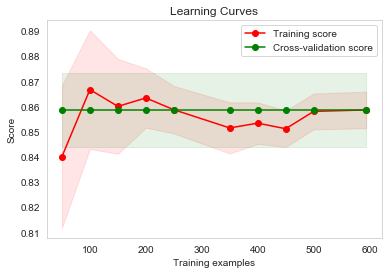

AdaBoostClassifier


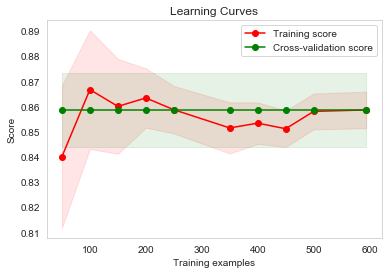

ExtraTreesClassifier


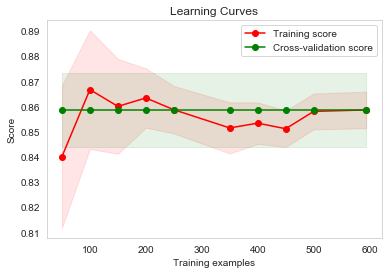

GradientBoostingClassifier


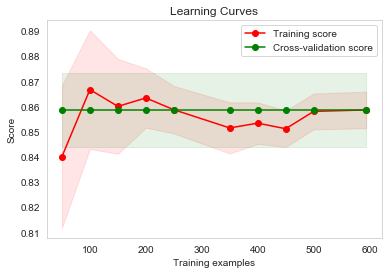

DecisionTreeClassifier


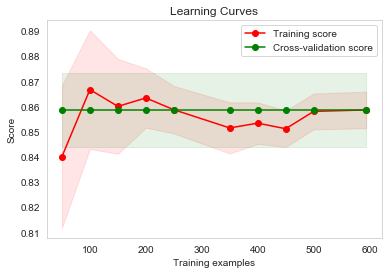

KNeighborsClassifier


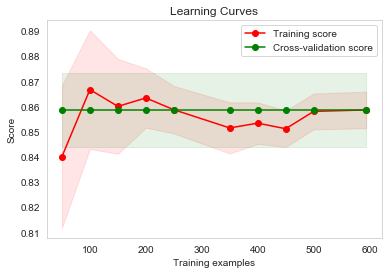

SVC


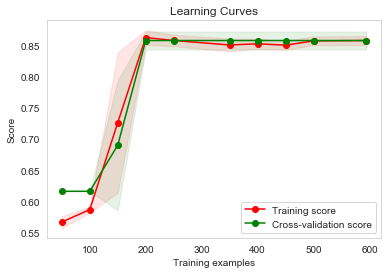

XGBClassifier


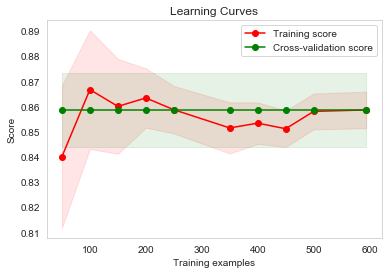

GaussianNB


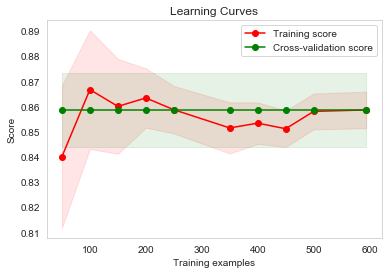

CatBoost


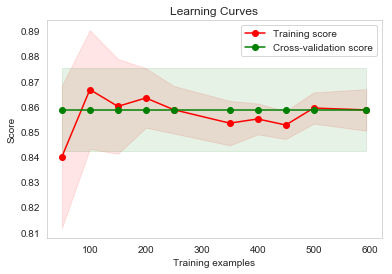

In [47]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0):
    plt.style.use('dark_background')
    sns.set_style('whitegrid')
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X = x_train
Y = y_train

# RandomForestClassifier(criterion='gini',oob_score=True,n_estimators=700,min_samples_split=10,warm_start=True,
#                             max_features='auto',max_depth=6,min_samples_split=3, min_samples_leaf=2, random_state=1,
#                             n_jobs=-1, verbose=0)
# RandomForest
rf_parameters = {'criterion':'gini','n_jobs': -1, 'n_estimators': 700 ,'max_features':'auto','warm_start': True,
                 'max_depth': 6,'min_samples_split':3,'random_state':1, 'min_samples_leaf': 2,'max_features' : 'sqrt','verbose': 0}

# AdaBoost
ada_parameters = {'n_estimators':500, 'learning_rate':0.1}

# ExtraTrees
et_parameters = {'n_jobs': -1, 'n_estimators':500, 'max_depth': 4, 'min_samples_leaf': 4, 'verbose': 0}

# GradientBoosting
gb_parameters = {'n_estimators': 500, 'max_depth': 7, 'min_samples_leaf': 2, 'verbose': 0}

# DecisionTree
dt_parameters = {'max_depth':3}

# KNeighbors
knn_parameters = {'n_neighbors':9,'algorithm':'auto','leaf_size':34}

# SVM
svm_parameters = {'kernel':'linear', 'C':0.025}

# XGB
gbm_parameters = {'n_estimators': 2000, 'max_depth': 6, 'min_child_weight': 3, 'gamma':0.9, 'subsample':0.8,
                  'colsample_bytree':0.25, 'objective': 'binary:logistic', 'nthread':-1, 'scale_pos_weight':1}

gnb_parameters = {}

cb_parameters = {}

title = "Learning Curves"

# 
print("RandomForestClassifier")
plot_learning_curve(RandomForestClassifier(**rf_parameters), title, X, Y, cv=None,  n_jobs=4, 
                    train_sizes=[50, 100, 150, 200, 250, 350, 400, 450, 500,594])
plt.show()
# 
print("AdaBoostClassifier")
plot_learning_curve(AdaBoostClassifier(**ada_parameters), title, X, Y, cv=None,  n_jobs=4, 
                    train_sizes=[50, 100, 150, 200, 250, 350, 400, 450, 500,594])
plt.show()
# 
print("ExtraTreesClassifier")
plot_learning_curve(ExtraTreesClassifier(**et_parameters), title, X, Y, cv=None,  n_jobs=4, 
                    train_sizes=[50, 100, 150, 200, 250, 350, 400, 450, 500,594])
plt.show()
# 
print("GradientBoostingClassifier")
plot_learning_curve(GradientBoostingClassifier(**gb_parameters), title, X, Y, cv=None,  n_jobs=4, 
                    train_sizes=[50, 100, 150, 200, 250, 350, 400, 450, 500,594])
plt.show()
# 
print("DecisionTreeClassifier")
plot_learning_curve(DecisionTreeClassifier(**dt_parameters), title, X, Y, cv=None,  n_jobs=4, 
                    train_sizes=[50, 100, 150, 200, 250, 350, 400, 450, 500,594])
plt.show()
# 
print("KNeighborsClassifier")
plot_learning_curve(KNeighborsClassifier(**knn_parameters), title, X, Y, cv=None,  n_jobs=4, 
                    train_sizes=[50, 100, 150, 200, 250, 350, 400, 450, 500,594])
plt.show()
# 
print("SVC")
plot_learning_curve(SVC(**svm_parameters), title, X, Y, cv=None,  n_jobs=4, 
                    train_sizes=[50, 100, 150, 200, 250, 350, 400, 450, 500,594])
plt.show()
# 
print("XGBClassifier")
plot_learning_curve(XGBClassifier(**gbm_parameters), title, X, Y, cv=None,  n_jobs=4, 
                    train_sizes=[50, 100, 150, 200, 250, 350, 400, 450, 500,594])
plt.show()
# 
print("GaussianNB")
plot_learning_curve(GaussianNB(**gnb_parameters), title, X, Y, cv=None,  n_jobs=4, 
                    train_sizes=[50, 100, 150, 200, 250, 350, 400, 450, 500,594])
plt.show()

print("CatBoost")
plot_learning_curve(CatBoostClassifier(**cb_parameters), title, X, Y, cv=None,  n_jobs=4, 
                    train_sizes=[50, 100, 150, 200, 250, 350, 400, 450, 500,594])
plt.show()
